# Logistic regression

In this notebook, we will look at an example of classification using Logistic regression. As an example, we will a diabetes dataset that can be used to classify whether people have diabetes, based on some various health measurements.

Let us first load the usual modules and the dataset (which is available on Moodle).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
diab_data = pd.read_csv('../Notebooks and data-7/diabetes.csv')

In [6]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


If we look at a scatter plot of Outcome vs Glucose, it might look like we potentially can separate diabetes from non-diabetes based on Glucose.

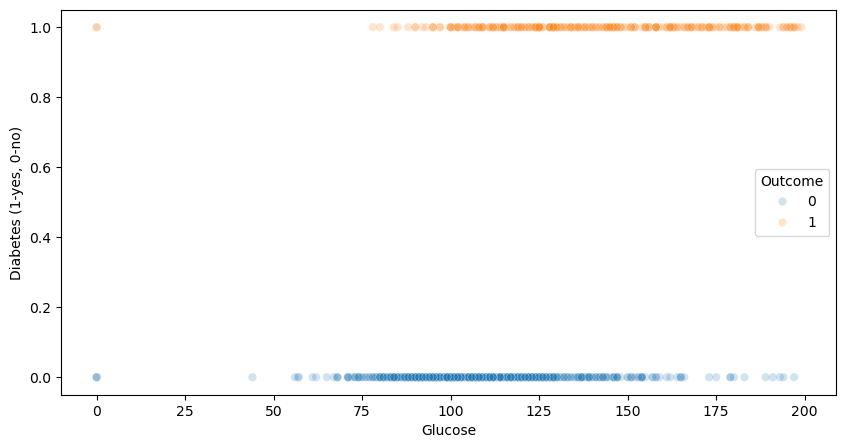

In [8]:
plt.rc("figure", figsize=(10, 5))
sns.scatterplot(data = diab_data, x = "Glucose", y = "Outcome", hue = "Outcome", alpha = 0.2)
plt.ylabel("Diabetes (1-yes, 0-no)")
plt.show()

The same we see from a boxplot

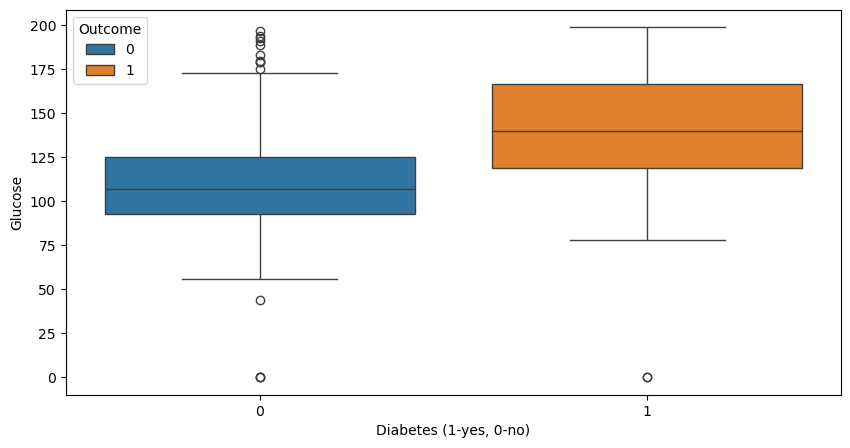

In [9]:
sns.boxplot(data = diab_data, y = "Glucose", x = "Outcome", hue = "Outcome")
plt.xlabel("Diabetes (1-yes, 0-no)")
plt.show()

Note that a Student t-test might tell us that there is a statistical significant difference in Glucose level for people with diabetes and people without diabetes. Moreover, the mean Glucose level for each group might give us a good estimate of the populations means. Still, we have no quantification of a cut-off in Glucose level, that can tell us for a particular Glucose level, whether it is most likely that a person have diabetes or not. However, this is exactly what logistic regression can give us.

### Train-test split

We will always do a train-test split of our data in machine learning, so let ud do it here as well.

In [10]:
X = diab_data[["Glucose"]]   # Note the double square brachets needed for simple linear regression in scikit-learn!
y = diab_data["Outcome"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

## Fitting logic regression using statsmodels

We can use the statsmodels module to fit logistic regression models. First, let import statsmodels:

In [12]:
import statsmodels.api as sm

As for linear regression we need to explicitly add an intercept to the data, both the training and the test data:

In [13]:
X_train = sm.add_constant(X_train)
X_train.head()

,const,Glucose
357,1.0,129
73,1.0,129
352,1.0,61
497,1.0,81
145,1.0,102


In [14]:
X_test = sm.add_constant(X_test)
X_test.head()

,const,Glucose
668,1.0,98
324,1.0,112
624,1.0,108
690,1.0,107
473,1.0,136


We can not fit a linear regression model using the Logic function from statsmodels

In [15]:
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.518532
         Iterations 6


As for linear regression we can also get an extensive summary of the model:

In [16]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      574
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.1956
Time:                        11:00:35   Log-Likelihood:                -298.67
converged:                       True   LL-Null:                       -371.29
Covariance Type:            nonrobust   LLR p-value:                 1.904e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5868      0.504    -11.079      0.000      -6.575      -4.598
Glucose        0.0397      0.004     10.145      0.000       0.032       0.047
==============================================================================
"""

### Evaluating the model

Before we can calculate the accuracy of the model, we need to make predictions from this model.

In [17]:
y_pred_train = logit_model.predict(X_train)
y_pred_train

357    0.385168
73     0.385168
352    0.040460
497    0.085296
145    0.176663
         ...   
71     0.482298
106    0.144647
270    0.170965
435    0.502133
102    0.348327
Length: 576, dtype: float64

In [18]:
y_pred_test = logit_model.predict(X_test)
y_pred_test

668    0.154746
324    0.241901
624    0.213993
690    0.207394
473    0.452671
         ...   
554    0.095055
319    0.892040
594    0.330534
6      0.076455
615    0.200947
Length: 192, dtype: float64

Note how these are probabilities of the class being 1, that is the person having diabetes. If we want to calculate accuracy, for instance, we need to turn these probabilities into 0s or 1s. As mentioned, the standard would be to turn the prediction into 1 if the probability is above 0.5, and 0 otherwise. We can do this easily:

In [19]:
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_train_binary

357    0
73     0
352    0
497    0
145    0
      ..
71     0
106    0
270    0
435    1
102    0
Length: 576, dtype: int32

In [20]:
y_pred_test_binary = (y_pred_test > 0.5).astype(int)
y_pred_test_binary

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      0
615    0
Length: 192, dtype: int32

With this we can now calculate the accuracy on both the training and the testset:

In [21]:
accuracy_score(y_train, y_pred_train_binary)

0.7569444444444444

In [22]:
accuracy_score(y_test, y_pred_test_binary)

0.7083333333333334

### Visualizing the model

Let us also visualize the model:

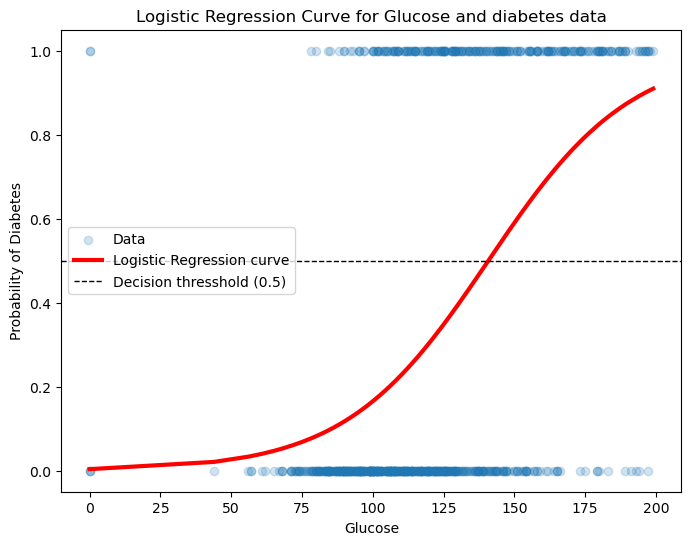

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Glucose'], y, alpha=0.2, label='Data')
plt.plot(X_train['Glucose'].sort_values(), y_pred_train.sort_values(), color='red', linewidth=3, label='Logistic Regression curve')
plt.axhline(y=0.5, color='black', linestyle="dashed", linewidth = 1, label = "Decision thresshold (0.5)")
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression Curve for Glucose and diabetes data')
plt.legend()
plt.show()

## Fitting logic regression using Scikit-learn

We can also use the Scikit-learn module to fit logistic regression models. First, let import the relevant sub-module (the same as for linear regression):

In [24]:
from sklearn import linear_model

In [25]:
logit_model_sk = linear_model.LogisticRegression()

In [26]:
X_train = X_train.drop(columns = ["const"])          # because we previously added an intercept, we do not need in Scikit-learn
X_test = X_test.drop(columns = ["const"])       

In [27]:
logit_model_sk.fit(X_train, y_train)

LogisticRegression()

### Evaluating the model

First we need to create predictions:

In [28]:
y_pred_train = logit_model_sk.predict(X_train)
y_pred_test = logit_model_sk.predict(X_test)

In [29]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Note that for Scikit-learn, we directly get the class labels and can therefore easily calculate the accuracy:

In [30]:
accuracy_score(y_train, y_pred_train)

0.7569444444444444

In [31]:
accuracy_score(y_test, y_pred_test)

0.7083333333333334

We are getting the same results as for statsmodels. 

If we wanted the predicted probabilities instead of the predicted class, we could also get those in Scikit-learn:

In [32]:
y_pred_train_prop = logit_model_sk.predict_proba(X_train)
y_pred_train_prop

array([[0.61483239, 0.38516761],
       [0.61483239, 0.38516761],
       [0.95953841, 0.04046159],
       ...,
       [0.82903288, 0.17096712],
       [0.4978695 , 0.5021305 ],
       [0.65167322, 0.34832678]])

Note, however, that we get probabilities for each of the two classes, so we have to do a bit extra only to get probabilities for diabetes:

In [33]:
y_pred_train_prop = y_pred_train_prop[: , 0]

In [34]:
y_pred_train_prop.sort()

In [35]:
y_pred_train_prop = pd.Series(y_pred_train_prop)
y_pred_train_prop

0      0.090288
1      0.093601
2      0.097022
3      0.097022
4      0.097022
         ...   
571    0.996267
572    0.996267
573    0.996267
574    0.996267
575    0.996267
Length: 576, dtype: float64

These we can now use to visualize the model as before:

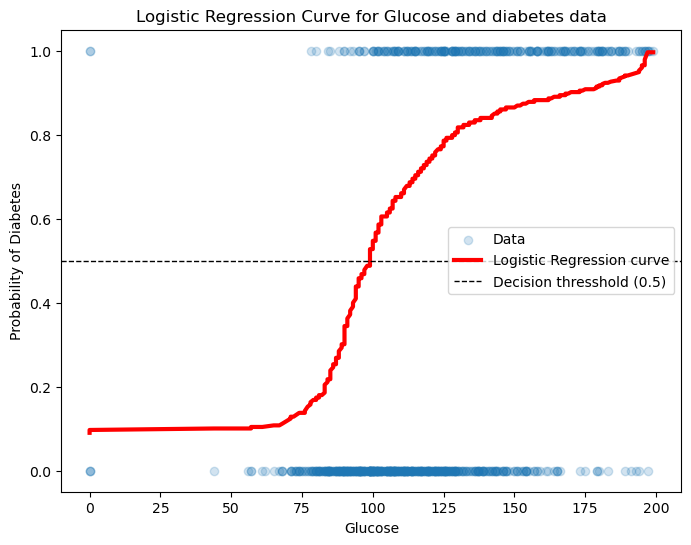

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Glucose'], y, alpha=0.2, label='Data')
plt.plot(X_train['Glucose'].sort_values(), y_pred_train_prop, color='red', linewidth=3, label='Logistic Regression curve')
plt.axhline(y=0.5, color='black', linestyle="dashed", linewidth = 1, label = "Decision thresshold (0.5)")
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression Curve for Glucose and diabetes data')
plt.legend()
plt.show()

## Multiple logistic regression in statsmodels

We can also use logistic regression if we have more than one X variable. It is straight forward in statsmodels.

We first create an X set with multiple feature variables, but then everything else is as in the case of a single feature variable.

In [37]:
X_multi = diab_data[["Glucose", "BMI"]]  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.25, random_state=42)  

In [ ]:
X_train = sm.add_constant(X_train)
X_train.head()

In [ ]:
X_test = sm.add_constant(X_test)
X_test.head()

In [ ]:
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
logit_model.summary()

In [ ]:
y_pred_train = logit_model.predict(X_train)
y_pred_test = logit_model.predict(X_test)

In [ ]:
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

In [ ]:
accuracy_score(y_train, y_pred_train_binary)

In [ ]:
accuracy_score(y_test, y_pred_test_binary)

We got a slightly better test accurarcy by adding BMI as a feature variable! Now, however, as we have more than one feature variable, we can no longer visualize the model in a nice way.

## Multiple logistic regression in Scikit-learn

This is also straight forward in Scikit-learn.

Again, we need to drop the intercept of the X datasets:

In [ ]:
X_train = X_train.drop(columns = ["const"])          # because we previously added an intercept, we do not need in Scikit-learn
X_test = X_test.drop(columns = ["const"])    

In [ ]:
logit_model_sk = linear_model.LogisticRegression()

In [ ]:
logit_model_sk.fit(X_train, y_train)

In [ ]:
y_pred_train = logit_model_sk.predict(X_train)
y_pred_test = logit_model_sk.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train)

In [ ]:
accuracy_score(y_test, y_pred_test)

Again, we get the same result as for statsmodels